# Machine Learning in Python
-----------------
Machine learning? In psychology?
<br> <br>
Machine Learning is a broad term for the application of predictive algorithms and models to both qualitative and quantitative data. Some examples include linear regression, logistic regression, random forests, and k-nearest neighbors.


### Decomposition + Clustering
-------------
Principal Component Analysis (or **PCA**) takes a data-driven approach to dimensionality reduction. In other words, it moves us from a dataset with *lots of variables* to a dataset with *few variables* - broadly, this process is referred to as **decomposition**.
<br> <br>
In this vignette, we'll take a high-dimensional dataset and reduce it down to two features. Then, we'll apply a **K-Means Clustering** algorithm to parse out "clusters" of similar participant response.
<br>

### Why is this useful?
---------------
I'm glad you asked!
<br> <br>
High-dimensional data run the risk of being **overfit** (in other words, we run the risk of yielding results that apply *only* to the observed data). There is *a lot* of math happening under the hood here, for a good primer on PCA check out [this Medium article](https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db#:~:text=Principal%20Component%20Analysis%20(PCA)%20is,dimensionality%20reduction%20in%20machine%20learning.&text=PCA%20can%20also%20be%20used,the%20most%20amount%20of%20variance.)

In [1]:
# Package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and peek at data
data = pd.read_csv("Dirty_Dozen.csv").iloc[:, :-1]
data.head()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy
0,2,4,5,1,4,5,4,3,3,2,...,1,1,1,1,2,2,1,37,2,98
1,4,2,2,4,3,4,4,5,4,3,...,2,2,3,4,4,4,3,34,3,95
2,5,5,5,4,2,5,5,4,4,2,...,2,4,3,3,4,4,2,22,2,80
3,4,1,2,2,4,5,2,2,5,2,...,5,4,1,4,2,3,4,24,1,99
4,5,3,4,5,5,5,4,5,4,3,...,2,5,2,4,4,1,5,21,2,90


In [3]:
print(len(data.columns))

25


In [4]:
print(data.shape)

(52861, 25)


## About this Dataset
------------
* Hypersensitive Narcissism Scale (HSNS) - 10 items
* "Dirty Dozen" scale - 4 measures each of narcissism, psychopathy, and Machiavellianism

This dataset has been pre-cleaned, so we can get right into analysis.

------------

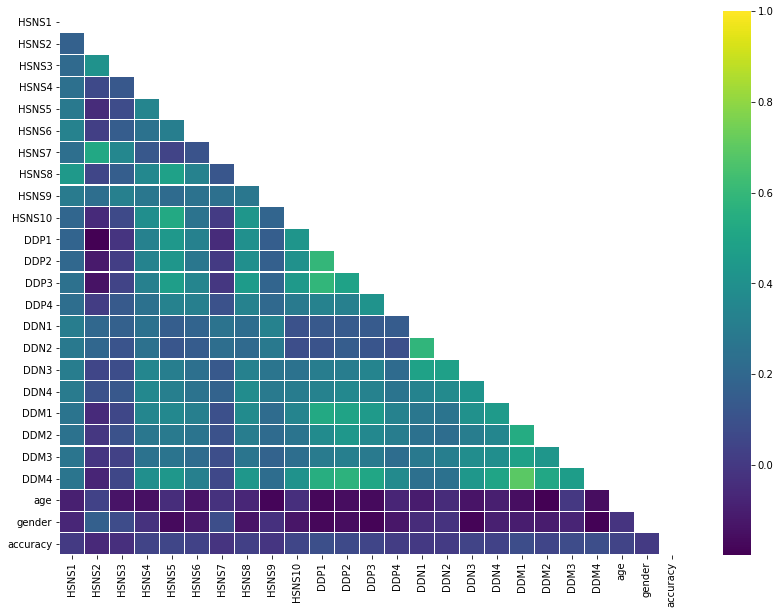

In [5]:
# Plot Dirty Dozen heatmap
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), mask=mask, linewidths=0.1, cmap="viridis")
plt.show()

## Principal Component Analysis (PCA)
-------------

In [6]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)

scaled_data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([[-1.50943637,  0.66652583,  1.21993002, ...,  1.02990199,
         1.2100907 ,  0.89946881],
       [ 0.20385   , -0.78912175, -1.12831496, ...,  0.75298289,
         3.18913298,  0.71318358],
       [ 1.06049318,  1.39434962,  1.21993002, ..., -0.35469351,
         1.2100907 , -0.21824256],
       ...,
       [-0.65279319, -1.51694554, -1.91106328, ...,  0.66067652,
        -0.76895158,  1.02365897],
       [ 1.06049318, -0.06129796,  1.21993002, ..., -0.35469351,
        -0.76895158,  1.02365897],
       [ 1.06049318, -0.06129796, -1.12831496, ..., -0.63161262,
         1.2100907 , -1.14966871]])

In [8]:
pca = PCA(n_components=2, random_state=101).fit(scaled_data)
decomp = pca.transform(scaled_data)

print("Original dataset shape: \t\t{}".format(str(data.shape)))
print("After PCA:\t\t\t\t{}".format(str(decomp.shape)))

Original dataset shape: 		(52861, 25)
After PCA:				(52861, 2)


In [9]:
decomp

array([[ 3.61052597,  0.09961834],
       [-0.56026562,  0.94330558],
       [-0.19329005, -2.53434865],
       ...,
       [ 3.72271088,  4.10881426],
       [-2.61853268,  1.82405729],
       [ 3.11359123, -1.31609776]])

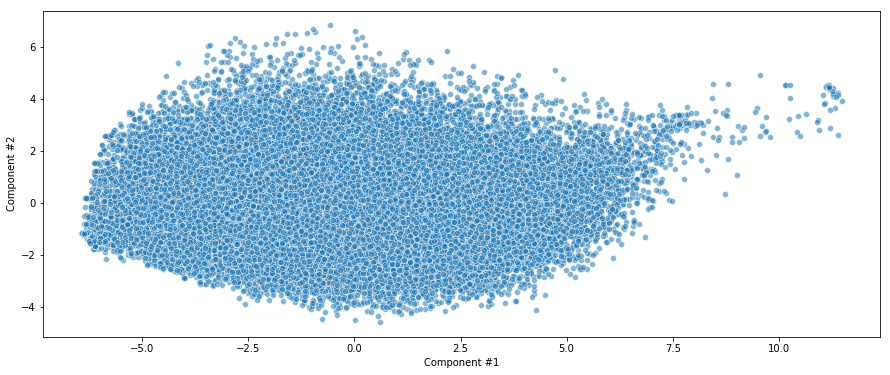

In [10]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = decomp[:,0], y = decomp[:,1], alpha=0.55)
plt.xlabel("Component #1")
plt.ylabel("Component #2")
plt.show()

In [11]:
# How do these components explain feature variance in the data?
print("Component #1: \t\t" + str(pca.explained_variance_[0]))
print("Component #2: \t\t" + str(pca.explained_variance_[1]))
print("Total Variance:\t\t" + str(pca.explained_variance_[0] + pca.explained_variance_[1]))

Component #1: 		7.079198516235778
Component #2: 		2.589159158519336
Total Variance:		9.668357674755114


Note that this is an **unsupervised algorithm** - in other words, we're not attempting to cluster based on a DV. 
<br> <br>
We include all the data in the decomposition process!

## K-Means Clustering
--------------

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

This selection was not arbitrary - we use something called the [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center.), which is computationally demanding on your computer's RAM.

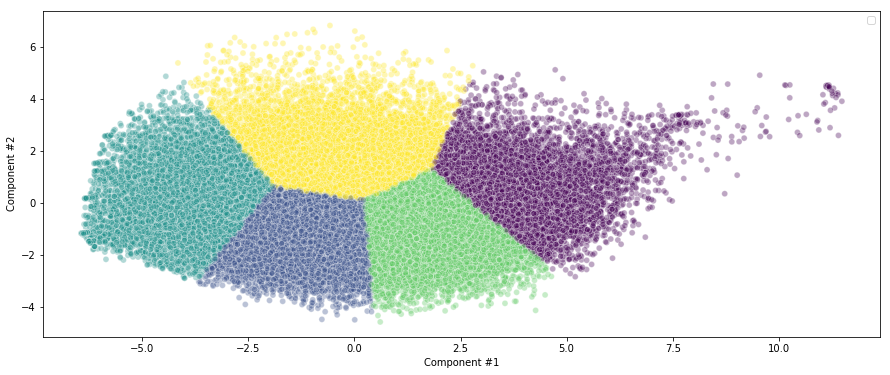

In [13]:
# Cluster data into 5 groups
km = KMeans(n_clusters=5, random_state=101)
km.fit(decomp)

# Cluster data with the trained K Means algorithm
groups = km.predict(decomp)

# Plot low dimensional data with clusters
plt.figure(figsize=(15,6))
sns.scatterplot(x = decomp[:, 0], y = decomp[:, 1], 
                hue = km.labels_, palette = "viridis", alpha = 0.35)
plt.xlabel("Component #1")
plt.ylabel("Component #2")
plt.legend("")
plt.show()

In [14]:
# Push to high dimensional space
data["CLUSTER"] = km.predict(decomp)
clustered_data = data.copy()

# Isolate columns
hsns_vars = list((clustered_data.filter(regex="HSNS")).columns)
ddp = list((clustered_data.filter(regex="DDP")).columns)
ddn = list((clustered_data.filter(regex="DDN")).columns)
ddm = list((clustered_data.filter(regex="DDM")).columns)

# Calculate row sums
clustered_data["HSNS_sum"] = clustered_data[hsns_vars].sum(axis=1)
clustered_data["DDP_sum"] = clustered_data[ddp].sum(axis=1)
clustered_data["DDN_sum"] = clustered_data[ddn].sum(axis=1)
clustered_data["DDM_sum"] = clustered_data[ddm].sum(axis=1)

# Drop subscale scores
badVars = (hsns_vars + ddp + ddn + ddm)
clustered_data.drop(badVars, axis=1, inplace=True)

clustered_data.groupby("CLUSTER").mean()

,age,gender,accuracy,HSNS_sum,DDP_sum,DDN_sum,DDM_sum
CLUSTER,,,,,,,
0,31.411973,1.521334,85.166207,23.991992,7.651438,8.367336,7.706709
1,24.037954,1.397983,80.756619,37.781621,12.600951,15.188868,13.955570
2,23.725829,1.251269,88.814843,40.635411,17.248029,16.983688,17.644269
3,26.657358,1.534416,81.103058,31.806481,9.209684,12.167185,10.323974
4,24.754123,1.220997,83.870794,31.068514,14.658562,11.300160,13.858449


**Takeaway**: Machine learning approaches to solving psychological problems allow us to explore nuanced differences in participant response, as well as yielding more reproducible (i.e., less "overfit") results!

**Up Next**: [Processing fMRI Data with NiLearn](http://localhost:8888/notebooks/Documents/ACADEMIA/04_Stanford/02_Projects/03_Professional-Dev/00_Python-in-Psych/04_Neuroimaging/SVM%20Classifiers.ipynb)